In [0]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import precision_recall_curve, auc
from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn.model_selection import cross_val_score, StratifiedKFold

from sklearn import svm
from sklearn.metrics import make_scorer

In [2]:
from google.colab import files
uploaded = files.upload()

Saving conversion_data.csv to conversion_data.csv


In [3]:
df = pd.read_csv("conversion_data.csv")
df=pd.get_dummies(df, columns = ["country","source"])
df_converted = df[df["converted"]==1]
df_notconverted = df[df["converted"]==0]
df.head()

,age,new_user,total_pages_visited,converted,country_China,country_Germany,country_UK,country_US,source_Ads,source_Direct,source_Seo
0,25,1,1,0,0,0,1,0,1,0,0
1,23,1,5,0,0,0,0,1,0,0,1
2,28,1,4,0,0,0,0,1,0,0,1
3,39,1,5,0,1,0,0,0,0,0,1
4,30,1,6,0,0,0,0,1,0,0,1


In [4]:
print(sum(df.converted == 1))
print(len(df))

10200
316200


In [0]:
y = df["converted"]
X = df.drop("converted", 1)
scaler = preprocessing.StandardScaler()
scaler.fit(X)
X = scaler.fit_transform(X)

x_train, x_test, y_train, y_test = train_test_split(X, y)

In [0]:
cl = LogisticRegression()
cl.fit(x_train, y_train)
pred = cl.predict(x_test)

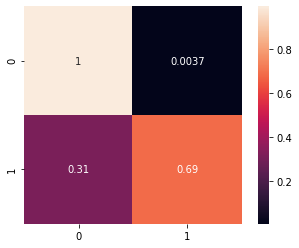

In [7]:
cm = confusion_matrix(y_test, pred, normalize="true")
cm1 = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True, square=True)

In [1]:
sns.heatmap(cm1, annot=True, square=True, fmt="d")

NameError: ignored

In [9]:
from sklearn.dummy import DummyClassifier
cl = DummyClassifier()
cl.fit(x_train, y_train)
pred = cl.predict(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


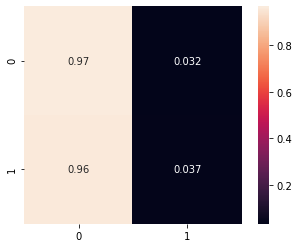

In [10]:
cm = confusion_matrix(y_test, pred, normalize="true")
sns.heatmap(cm, annot=True, square=True)

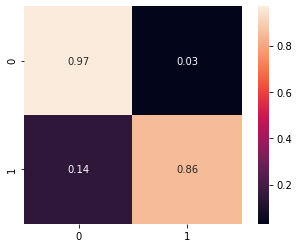

GaussianNB(priors=None, var_smoothing=1e-09) :
Accuracy: 0.91 (+/- 0.00)


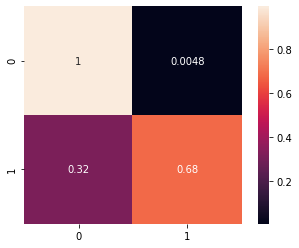

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) :
Accuracy: 0.83 (+/- 0.01)


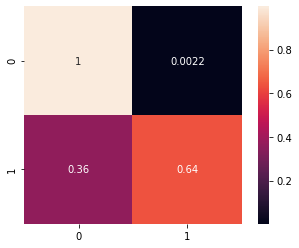

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) :
Accuracy: 0.81 (+/- 0.01)


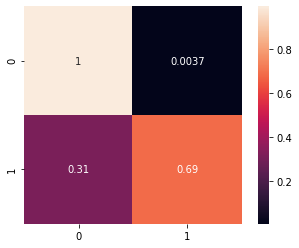

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) :
Accuracy: 0.84 (+/- 0.01)


In [11]:
models = (
    GaussianNB(),
    RandomForestClassifier(max_depth=15, n_estimators=50),
    svm.SVC(),
    LogisticRegression()  
)

accuracies = []

for m in models :
    m.fit(x_train, y_train)
    pred = m.predict(x_test)
    cm = confusion_matrix(y_test, pred, normalize="true")
    sns.heatmap(cm, annot=True, square=True)
    plt.show()
    cv = cross_val_score(m, x_train, y_train, cv=5, scoring=make_scorer(roc_auc_score))
    print(m, ":")
    print("Accuracy: %0.2f (+/- %0.2f)" % (cv.mean(), cv.std() * 2))
    accuracies.append(cv.mean())

In [12]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_rdmsamp, y_rdmsamp = rus.fit_resample(X, y)

x_train, x_test, y_train, y_test = train_test_split(X_rdmsamp, y_rdmsamp)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [13]:
from sklearn.dummy import DummyClassifier
cl = DummyClassifier()
cl.fit(x_train, y_train)
pred = cl.predict(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


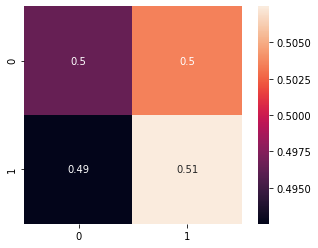

In [14]:
cm = confusion_matrix(y_test, pred, normalize="true")
sns.heatmap(cm, annot=True, square=True)

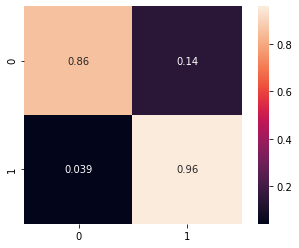

GaussianNB(priors=None, var_smoothing=1e-09) :
Accuracy: 0.92 (+/- 0.01)


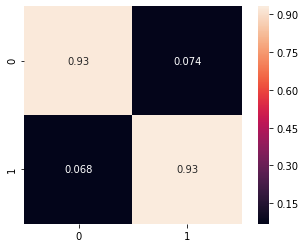

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) :
Accuracy: 0.93 (+/- 0.02)


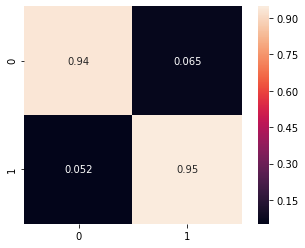

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) :
Accuracy: 0.94 (+/- 0.01)


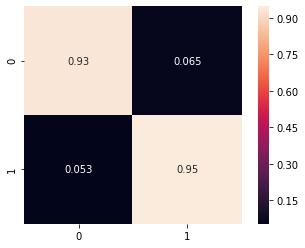

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) :
Accuracy: 0.94 (+/- 0.01)


In [15]:
accuracies_usamp = []

for m in models : 
    m.fit(x_train, y_train)
    pred = m.predict(x_test)
    cm = confusion_matrix(y_test, pred, normalize="true")
    sns.heatmap(cm, annot=True, square=True)
    plt.show()
    cv = cross_val_score(m, x_train, y_train, cv=5, scoring=make_scorer(roc_auc_score))
    print(m, ":")
    print("Accuracy: %0.2f (+/- %0.2f)" % (cv.mean(), cv.std() * 2))
    accuracies_usamp.append(cv.mean())

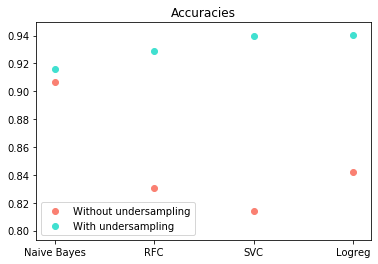

In [16]:
plt.title("Accuracies")
plt.scatter(["Naive Bayes","RFC","SVC","Logreg"], accuracies, color="salmon")
plt.scatter(["Naive Bayes","RFC","SVC","Logreg"], accuracies_usamp, color="turquoise")
plt.legend(("Without undersampling","With undersampling"))